In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/Competitors_Data_smp.csv')

In [3]:
df.head(10)

,Date,Banks name,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,Aragatsotn,...,Profit/(loss)beforetax,Incometax,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted
0,6/30/2020,Artsakh,8,0,0,0,0,0,0,0,...,3762875,600000,3162875,136429315.0,51374936.0,300538.00,0.243934,4.099466,181614,39935971
1,6/30/2020,ASHB,18,6,4,5,5,6,3,3,...,8024394,1210614,6813780,419079269.0,383535722.0,3648179.00,0.313053,3.194348,7329319,59270072
2,6/30/2020,Byblos,3,0,0,0,0,0,0,0,...,875417,211982,663435,51569364.0,47800726.0,13153.00,0.412231,2.425826,375559,33707881
3,6/30/2020,Converse,16,1,2,1,1,6,3,1,...,2517911,596441,1921470,125384623.1,192013205.4,2624180.47,0.562603,1.777453,2270987,26022624
4,6/30/2020,Econom,30,3,1,2,2,5,2,1,...,4354867,902798,3452069,188014720.0,101079901.0,1274573.00,0.463570,2.157172,1309797,36205620
5,6/30/2020,Evoca,10,1,0,0,0,1,0,0,...,1279100,267951,1011149,102043037.3,85280184.0,850806.00,0.447886,2.232710,450328,15262224
6,6/30/2020,HSBC,8,0,0,0,0,0,0,0,...,1677685,280971,1396714,103517386.0,105697426.0,3690419.00,0.726710,1.376064,1426690,24471851
7,6/30/2020,IDbank,10,1,0,0,0,1,1,0,...,1034897,392044,642853,93527425.0,57516948.0,4957143.00,0.598379,1.671181,436771,32106581
8,6/30/2020,Ineco,18,2,0,0,1,2,1,1,...,3946783,730252,3216531,213068725.0,138530752.0,1010653.00,0.312043,3.204682,1624738,38071815
9,6/30/2020,Mellat,1,0,0,0,0,0,0,0,...,1448180,274204,1173976,42195906.0,26327078.0,56422.00,0.217779,4.591806,176916,27446352


In [4]:
df.shape

(114, 55)

In [5]:
df.columns

Index(['Date', 'Banks name', 'Yerevan', 'Lori', 'Tavush', 'Syuniq', 'Ararat',
       'Kotayq', 'Armavir', 'Aragatsotn', 'Shirak', 'Gegharquniq',
       'Vayots Dzor', 'NKR', 'NPL (%)_r', 'NPL(AMDths)', 'LoanPortfolio(net)',
       'Provisions', 'LoanPortfolio(Gross)', 'Coverageratio',
       'TheimpairmenttotheNPL', 'CostofCreditRisk', 'TotalAssets',
       'TotalLiabilities', 'TotalCapital',
       'StatutoryCapital\n(w/oincomefromemission)', 'Loans',
       'Liabilitiestocustomers', 'Liabilitiestocustomers(incl.securities)',
       'EmittedSecurities', 'ProfitAftertax', 'ROA\n(Annualized)',
       'ROE\n(Annualized)', 'Interestandsimilarincome',
       'Interestandsimilarexpenses', 'Netinterestincome',
       'Commisssionsreceived', 'Commisssionspaid', 'Netcommissions',
       'Dividendsreceived', 'Netotheroperatingincome', 'Operatingincome',
       'Netprovisions', 'Totaladministrativeexpenses', 'Otherincome/exspenses',
       'Profit/(loss)beforetax', 'Incometax', 'Profit/(loss)aft

In [6]:
df.describe

<bound method NDFrame.describe of            Date Banks name  Yerevan  Lori  Tavush  Syuniq  Ararat  Kotayq  \
0     6/30/2020    Artsakh        8     0       0       0       0       0   
1     6/30/2020       ASHB       18     6       4       5       5       6   
2     6/30/2020     Byblos        3     0       0       0       0       0   
3     6/30/2020   Converse       16     1       2       1       1       6   
4     6/30/2020     Econom       30     3       1       2       2       5   
..          ...        ...      ...   ...     ...     ...     ...     ...   
109  12/31/2021     IDbank       10     1       0       0       0       1   
110  12/31/2021      Ineco       18     2       0       0       1       2   
111  12/31/2021     Mellat        1     0       0       0       0       0   
112  12/31/2021        Uni       32     3       1       3       2       2   
113  12/31/2021        VTB       28     5       4       5       4       6   

     Armavir  Aragatsotn  ...  Profit/(lo

In [7]:
df.describe()

,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,Aragatsotn,Shirak,Gegharquniq,...,Profit/(loss)beforetax,Incometax,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted
count,114.00000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,1.140000e+02,1.140000e+02,1.140000e+02,1.090000e+02,1.090000e+02,1.090000e+02,114.000000,114.000000,1.140000e+02,1.140000e+02
mean,16.04386,2.087719,1.307018,1.596491,1.412281,2.500000,1.307018,1.228070,2.192982,1.491228,...,3.828834e+06,7.346549e+05,3.094179e+06,2.137618e+08,1.736184e+08,2.857977e+06,0.424446,2.746358,2.294397e+06,5.656761e+07
std,10.05154,2.002483,1.591611,1.798324,1.702738,2.285971,1.248909,1.591099,2.276767,1.839804,...,4.078108e+06,7.381774e+05,3.369742e+06,1.441430e+08,1.530412e+08,2.435876e+06,0.149168,1.251892,3.182948e+06,5.228789e+07
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.548790e+05,-3.766800e+04,-2.172100e+05,4.219591e+07,2.632708e+07,0.000000e+00,0.126833,1.358156,-9.437320e+05,1.269609e+07
25%,8.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.270344e+06,2.790118e+05,9.433482e+05,1.165223e+08,9.662225e+07,1.010653e+06,0.304775,1.788878,2.433600e+05,2.635340e+07
50%,16.00000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,2.448544e+06,4.600255e+05,1.964302e+06,1.447328e+08,1.172183e+08,2.624180e+06,0.420121,2.380274,1.131936e+06,3.567061e+07
75%,26.25000,4.000000,2.000000,3.000000,2.000000,5.000000,2.000000,2.000000,4.000000,3.000000,...,4.855301e+06,9.847048e+05,3.918022e+06,2.837109e+08,1.854040e+08,3.944970e+06,0.559010,3.281123,2.978718e+06,6.507741e+07
max,33.00000,6.000000,4.000000,5.000000,5.000000,6.000000,4.000000,6.000000,7.000000,5.000000,...,2.387172e+07,4.455654e+06,1.941607e+07,5.861165e+08,7.027399e+08,1.149824e+07,0.736292,7.884408,1.574972e+07,2.559987e+08


In [8]:
df.dtypes

Date                                          object
Banks name                                    object
Yerevan                                        int64
Lori                                           int64
Tavush                                         int64
Syuniq                                         int64
Ararat                                         int64
Kotayq                                         int64
Armavir                                        int64
Aragatsotn                                     int64
Shirak                                         int64
Gegharquniq                                    int64
Vayots Dzor                                    int64
NKR                                            int64
NPL (%)_r                                    float64
NPL(AMDths)                                    int64
LoanPortfolio(net)                             int64
Provisions                                     int64
LoanPortfolio(Gross)                          

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      114 non-null    datetime64[ns]
 1   Banks name                                114 non-null    object        
 2   Yerevan                                   114 non-null    int64         
 3   Lori                                      114 non-null    int64         
 4   Tavush                                    114 non-null    int64         
 5   Syuniq                                    114 non-null    int64         
 6   Ararat                                    114 non-null    int64         
 7   Kotayq                                    114 non-null    int64         
 8   Armavir                                   114 non-null    int64         
 9   Aragatsotn                      

In [11]:
df.nunique()

Date                                           7
Banks name                                    17
Yerevan                                       24
Lori                                           7
Tavush                                         5
Syuniq                                         6
Ararat                                         6
Kotayq                                         7
Armavir                                        5
Aragatsotn                                     7
Shirak                                         7
Gegharquniq                                    6
Vayots Dzor                                    4
NKR                                            9
NPL (%)_r                                    110
NPL(AMDths)                                  114
LoanPortfolio(net)                           114
Provisions                                   114
LoanPortfolio(Gross)                         114
Coverageratio                                113
TheimpairmenttotheNP

In [12]:
df.isna().sum()

Date                                         0
Banks name                                   0
Yerevan                                      0
Lori                                         0
Tavush                                       0
Syuniq                                       0
Ararat                                       0
Kotayq                                       0
Armavir                                      0
Aragatsotn                                   0
Shirak                                       0
Gegharquniq                                  0
Vayots Dzor                                  0
NKR                                          0
NPL (%)_r                                    0
NPL(AMDths)                                  0
LoanPortfolio(net)                           0
Provisions                                   0
LoanPortfolio(Gross)                         0
Coverageratio                                0
TheimpairmenttotheNPL                        0
CostofCreditR

In [13]:
df.duplicated('Banks name').sum()

97

In [14]:
df[df['Banks name'] == 'Ameria']

,Date,Banks name,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,Aragatsotn,...,Profit/(loss)beforetax,Incometax,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted
14,2020-09-30,Ameria,12,1,1,2,0,1,1,0,...,8416609,1564446,6852163,369775160.0,529600185.0,9276546.0,0.379353,2.636066,5418824,69381704
31,2020-12-31,Ameria,12,1,1,2,0,1,1,0,...,11182129,2181925,9000204,380162200.6,702739888.0,7860634.0,0.350899,2.849826,9797236,62745294
48,2021-03-31,Ameria,13,1,1,2,0,1,1,0,...,4926229,960167,3966062,389676582.4,613346035.0,7482378.0,0.360001,2.777768,2107827,63248738
65,2021-06-30,Ameria,14,1,1,2,0,1,1,0,...,11726991,2245750,9481241,382374712.5,642537406.0,9143800.0,0.373372,2.678295,5044337,56671543
82,2021-09-30,Ameria,14,1,1,2,0,2,1,0,...,17906332,3410567,14495765,417918500.0,651928831.0,9039266.0,0.382424,2.614898,8313497,61281420
99,2021-12-31,Ameria,15,1,1,2,0,2,1,0,...,23871721,4455654,19416067,445854488.0,643702026.0,7164536.0,0.405597,2.465503,10154744,65703093


In [15]:
df.columns

Index(['Date', 'Banks name', 'Yerevan', 'Lori', 'Tavush', 'Syuniq', 'Ararat',
       'Kotayq', 'Armavir', 'Aragatsotn', 'Shirak', 'Gegharquniq',
       'Vayots Dzor', 'NKR', 'NPL (%)_r', 'NPL(AMDths)', 'LoanPortfolio(net)',
       'Provisions', 'LoanPortfolio(Gross)', 'Coverageratio',
       'TheimpairmenttotheNPL', 'CostofCreditRisk', 'TotalAssets',
       'TotalLiabilities', 'TotalCapital',
       'StatutoryCapital\n(w/oincomefromemission)', 'Loans',
       'Liabilitiestocustomers', 'Liabilitiestocustomers(incl.securities)',
       'EmittedSecurities', 'ProfitAftertax', 'ROA\n(Annualized)',
       'ROE\n(Annualized)', 'Interestandsimilarincome',
       'Interestandsimilarexpenses', 'Netinterestincome',
       'Commisssionsreceived', 'Commisssionspaid', 'Netcommissions',
       'Dividendsreceived', 'Netotheroperatingincome', 'Operatingincome',
       'Netprovisions', 'Totaladministrativeexpenses', 'Otherincome/exspenses',
       'Profit/(loss)beforetax', 'Incometax', 'Profit/(loss)aft

In [16]:
# almost clean data, even no need of astype() 

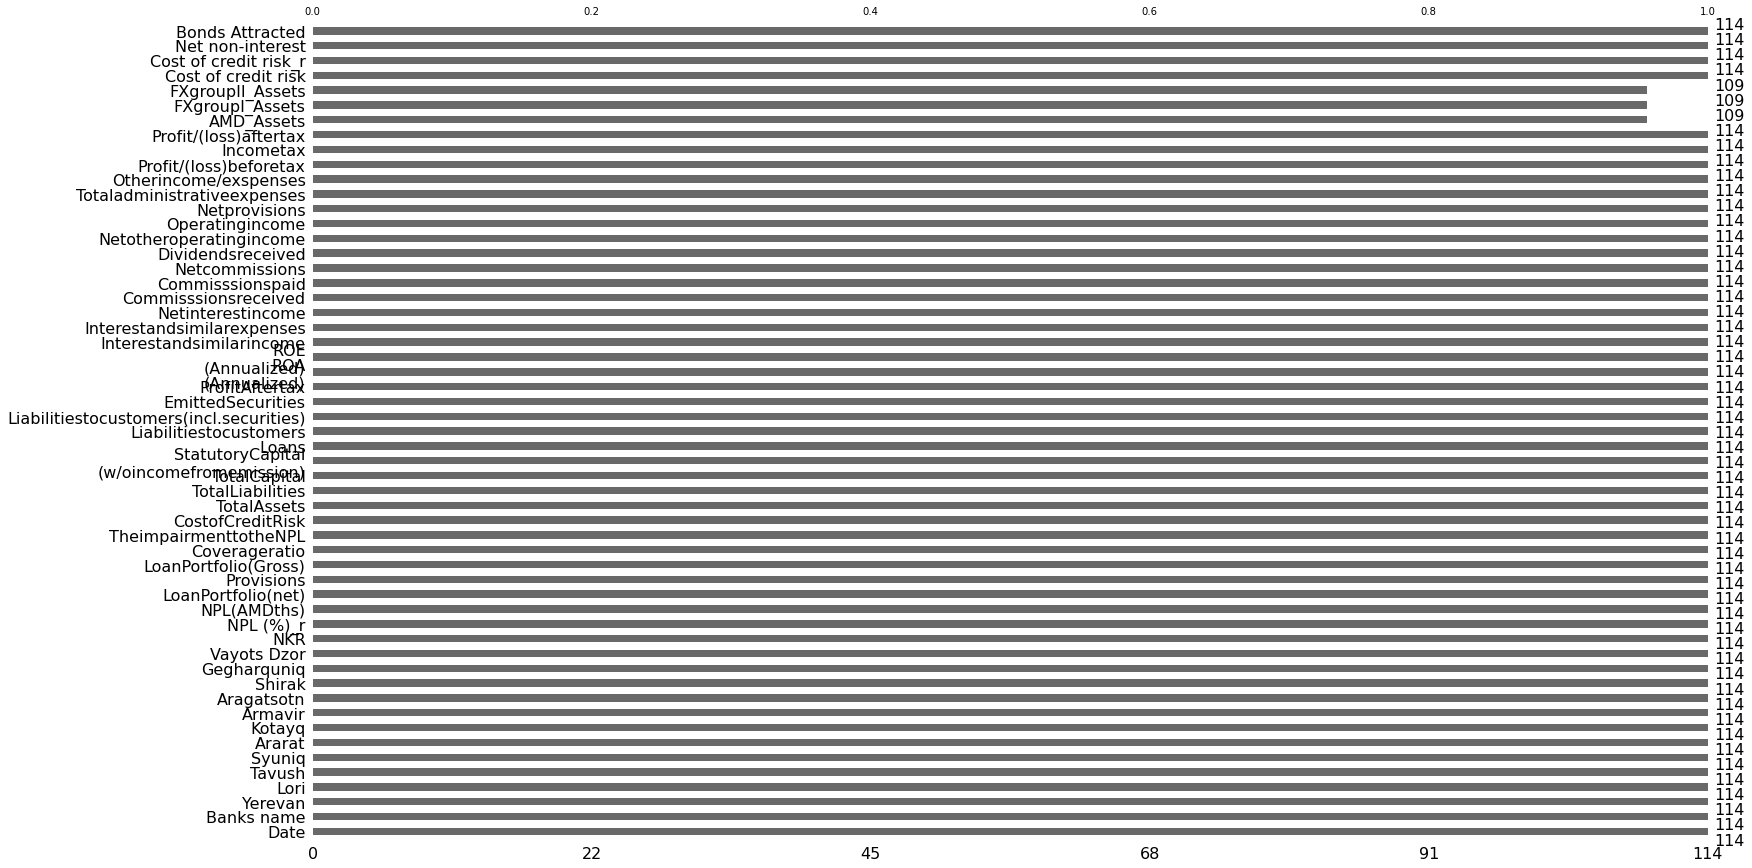

In [17]:
missingno.bar(df)
plt.show()

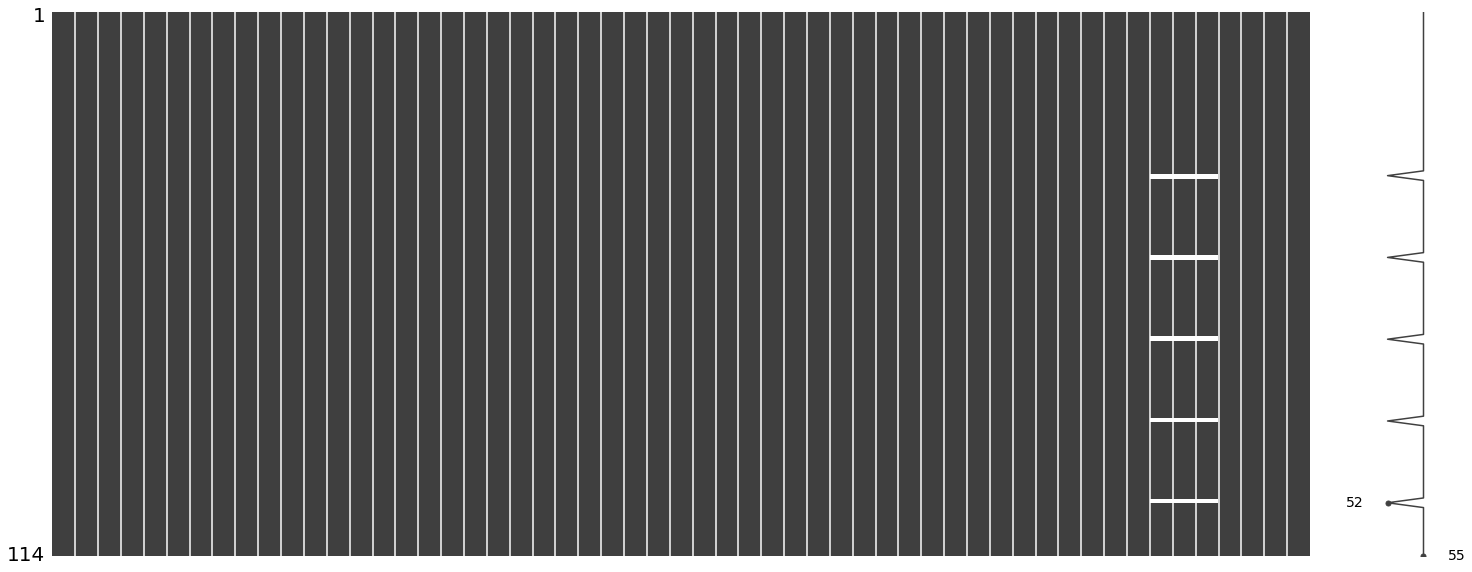

In [18]:
missingno.matrix(df)
plt.show()

In [19]:
# For branches by marzes data the missings are just 0s, as before 2018 0s were not filled; So, let's fill

In [20]:
df[['Yerevan', 'Lori','Tavush','Syuniq','Ararat','Kotayq','Armavir','Aragatsotn',
   'Shirak','Gegharquniq','Vayots Dzor','NKR']] = df[['Yerevan', 'Lori','Tavush','Syuniq','Ararat','Kotayq','Armavir',
                                                      'Aragatsotn',   'Shirak','Gegharquniq','Vayots Dzor',
                                                      'NKR']].fillna(value=0)

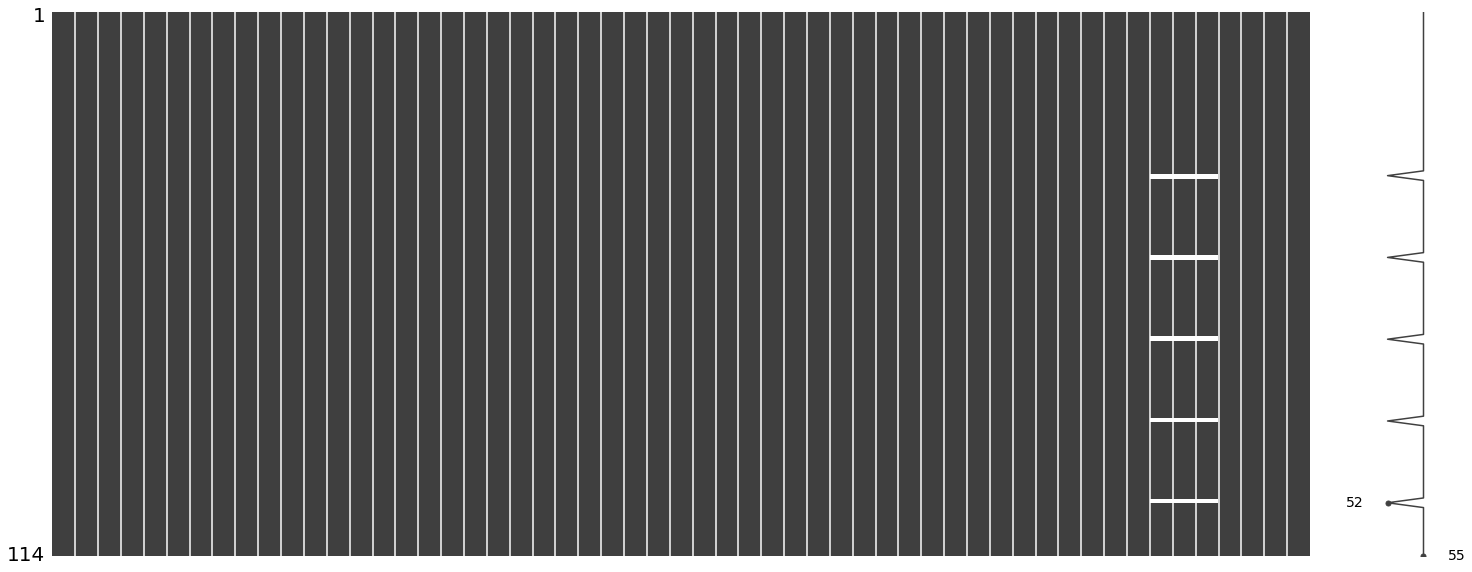

In [21]:
missingno.matrix(df)
plt.show()

In [22]:
# Filling missings by KNN

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.impute import KNNImputer

In [24]:
df1 = df.drop('Date', axis = 1)
df1 = df1.drop('Banks name', axis = 1)
#df1 = df1.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146], axis = 0)

In [25]:
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=df1.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

k_errors = optimize_k(data=df1, target='AMD_Assets')

In [26]:
k_errors

[{'K': 1, 'RMSE': 22663323.48831128},
 {'K': 3, 'RMSE': 20729028.419478502},
 {'K': 5, 'RMSE': 22699522.468099196},
 {'K': 7, 'RMSE': 21479333.627677895},
 {'K': 9, 'RMSE': 20352588.748721052},
 {'K': 11, 'RMSE': 22408282.067251015},
 {'K': 13, 'RMSE': 22475070.846804652},
 {'K': 15, 'RMSE': 23226765.295584105},
 {'K': 17, 'RMSE': 25335783.18432658},
 {'K': 19, 'RMSE': 20359299.10603952}]

In [27]:
# so, the optimal K is 11
imputer = KNNImputer(n_neighbors=11)
imputed = imputer.fit_transform(df1)
df_imputed = pd.DataFrame(imputed, columns=df1.columns)

In [28]:
df_append = df.drop('Date', axis = 1)
df_append = df_append.drop('Banks name', axis = 1)
df_append = df_append.head(147)

In [29]:
df_append = df_append.append(df_imputed)
df_append = df_append.reset_index(drop=True)

In [30]:
df_new = pd.concat([df[['Date', 'Banks name']], df_append], axis = 1)
df_new

,Date,Banks name,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,Aragatsotn,...,Profit/(loss)beforetax,Incometax,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted
0,2020-06-30,Artsakh,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3762875.0,600000.0,3162875.0,136429315.0,51374936.0,300538.00,0.243934,4.099466,181614.0,39935971.0
1,2020-06-30,ASHB,18.0,6.0,4.0,5.0,5.0,6.0,3.0,3.0,...,8024394.0,1210614.0,6813780.0,419079269.0,383535722.0,3648179.00,0.313053,3.194348,7329319.0,59270072.0
2,2020-06-30,Byblos,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,875417.0,211982.0,663435.0,51569364.0,47800726.0,13153.00,0.412231,2.425826,375559.0,33707881.0
3,2020-06-30,Converse,16.0,1.0,2.0,1.0,1.0,6.0,3.0,1.0,...,2517911.0,596441.0,1921470.0,125384623.1,192013205.4,2624180.47,0.562603,1.777453,2270987.0,26022624.0
4,2020-06-30,Econom,30.0,3.0,1.0,2.0,2.0,5.0,2.0,1.0,...,4354867.0,902798.0,3452069.0,188014720.0,101079901.0,1274573.00,0.463570,2.157172,1309797.0,36205620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,NaT,NaN,10.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2915818.0,667579.0,2248239.0,133343685.0,60266853.0,4404962.00,0.688308,1.452839,860128.0,27501869.0
224,NaT,NaN,18.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,...,11047007.0,2039711.0,9007296.0,283710908.0,140410904.0,2382104.00,0.349924,2.857759,5404005.0,94105069.0
225,NaT,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3310311.0,632579.0,2677732.0,47696767.0,35314301.0,181187.00,0.233579,4.281210,-173277.0,38145095.0
226,NaT,NaN,32.0,3.0,1.0,3.0,2.0,2.0,2.0,2.0,...,553520.0,152549.0,400971.0,125415531.0,126442995.0,3992707.00,0.304397,3.285187,2661493.0,16882118.0


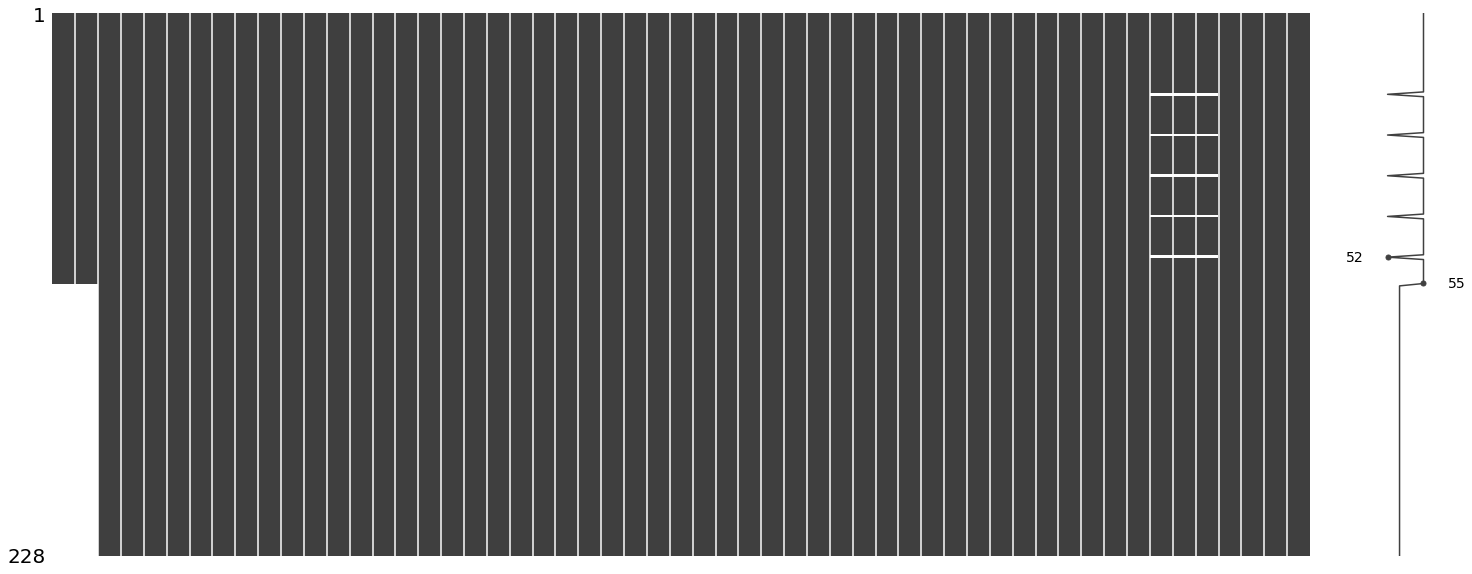

In [31]:
missingno.matrix(df_new)
plt.show()

In [32]:
df_new.to_csv('./data/df_cleaned.csv')

In [33]:
'''
sns.pairplot(df_new[['Banks name','Yerevan', 'Lori', 'Tavush', 'Syuniq', 'Ararat','Kotayq', 'Armavir', 'Aragatsotn', 'Shirak', 
                     'Gegharquniq','Vayots Dzor', 'NKR']], 
#             hue = 'Banks name', 
#             markers=["o", "s"], 
             vars = ['Yerevan', 'Lori', 'Tavush', 'Syuniq', 'Ararat','Kotayq', 'Armavir', 'Aragatsotn', 'Shirak', 
                     'Gegharquniq','Vayots Dzor', 'NKR'], 
             palette = sns.color_palette("bright", 10))
             '''

'\nsns.pairplot(df_new[[\'Banks name\',\'Yerevan\', \'Lori\', \'Tavush\', \'Syuniq\', \'Ararat\',\'Kotayq\', \'Armavir\', \'Aragatsotn\', \'Shirak\', \n                     \'Gegharquniq\',\'Vayots Dzor\', \'NKR\']], \n#             hue = \'Banks name\', \n#             markers=["o", "s"], \n             vars = [\'Yerevan\', \'Lori\', \'Tavush\', \'Syuniq\', \'Ararat\',\'Kotayq\', \'Armavir\', \'Aragatsotn\', \'Shirak\', \n                     \'Gegharquniq\',\'Vayots Dzor\', \'NKR\'], \n             palette = sns.color_palette("bright", 10))\n             '

In [34]:
# Note that some banks were closed (Procredit, Arexim, BTA, etc.)

In [35]:
marzes = [['Yerevan', 'Lori', 'Tavush'], ['Syuniq', 'Ararat','Kotayq'], ['Armavir', 'Aragatsotn', 'Shirak'], 
                     ['Gegharquniq','Vayots Dzor', 'NKR']]

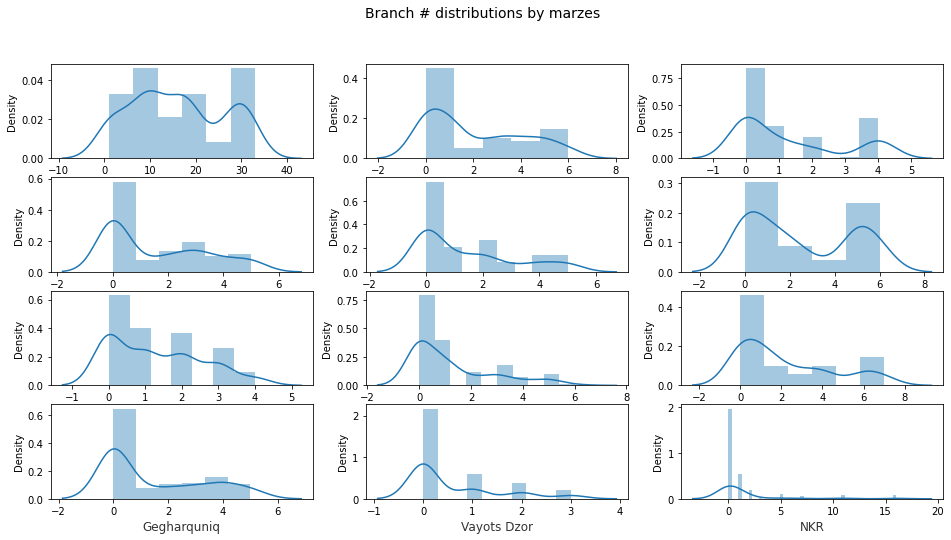

In [36]:
f, axs = plt.subplots(4, 3, figsize = (16,8))
f.suptitle('Branch # distributions by marzes', fontsize=14)

for i in range(0,4):
    for j in range(0,3):
        sns.distplot(df_new[marzes[i][j]], kde=True, ax=axs[i,j])
        axs[i,j].set_xlabel(marzes[i][j],size = 12,alpha=0.8)        
plt.show()

In [37]:
# Visually # of branches indicator is most probably coming from log-normal distribution 

In [38]:
BS1 = ['LoanPortfolio(net)', 'Provisions', 'LoanPortfolio(Gross)','TotalAssets', 'TotalLiabilities', 'TotalCapital',
       'StatutoryCapital\n(w/oincomefromemission)', 'Loans', 'Liabilitiestocustomers', 
       'Liabilitiestocustomers(incl.securities)', 'EmittedSecurities', 'NPL(AMDths)']

In [39]:
BS2 = [['LoanPortfolio(net)', 'Provisions', 'LoanPortfolio(Gross)'],['TotalAssets', 'TotalLiabilities', 'TotalCapital'],
       ['StatutoryCapital\n(w/oincomefromemission)', 'Loans', 'Liabilitiestocustomers'], 
       ['Liabilitiestocustomers(incl.securities)', 'EmittedSecurities','NPL(AMDths)']]

In [40]:
BS3 = ['LoanPortfolio(net)','TotalAssets', 'TotalLiabilities', 'TotalCapital',       
       'Liabilitiestocustomers(incl.securities)','Bonds Attracted']

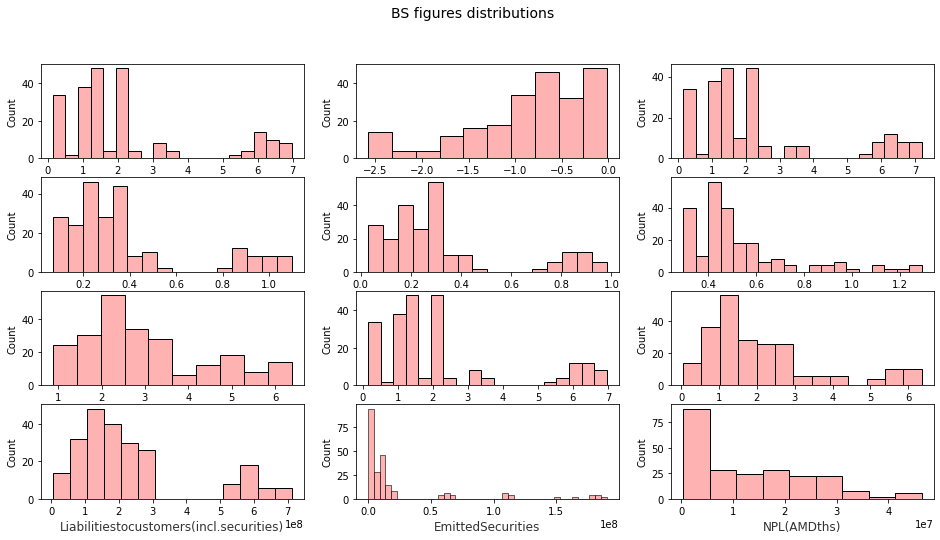

In [41]:
f, axs = plt.subplots(4, 3, figsize = (16,8))
f.suptitle('BS figures distributions', fontsize=14)

for i in range(0,4):
    for j in range(0,3):
        sns.histplot(df_new, x=BS2[i][j],  color = '#FF9999', ax=axs[i,j])
#        sns.histplot(df_new[BS2[i][j]], kde=True, color = '#FF9999', ax=axs[i,j])
        axs[i,j].set_xlabel(BS2[i][j],size = 12,alpha=0.8)        
plt.show()

In [42]:
PnL1 = ['ProfitAftertax', 'Interestandsimilarincome', 'Interestandsimilarexpenses', 'Netinterestincome',
       'Commisssionsreceived', 'Commisssionspaid', 'Netcommissions', 'Dividendsreceived', 'Netotheroperatingincome', 
        'Operatingincome', 'Netprovisions', 'Totaladministrativeexpenses', 'Otherincome/exspenses',
       'Profit/(loss)beforetax', 'Incometax', 'Profit/(loss)aftertax']

In [43]:
PnL2 = [['ProfitAftertax', 'Interestandsimilarincome', 'Interestandsimilarexpenses', 'Netinterestincome'],[
       'Commisssionsreceived', 'Commisssionspaid', 'Netcommissions', 'Dividendsreceived'], ['Netotheroperatingincome', 
        'Operatingincome', 'Netprovisions', 'Totaladministrativeexpenses'], ['Otherincome/exspenses',
       'Profit/(loss)beforetax', 'Incometax', 'Profit/(loss)aftertax']]

In [44]:
PnL3 = ['Netinterestincome','Net non-interest','Profit/(loss)aftertax']

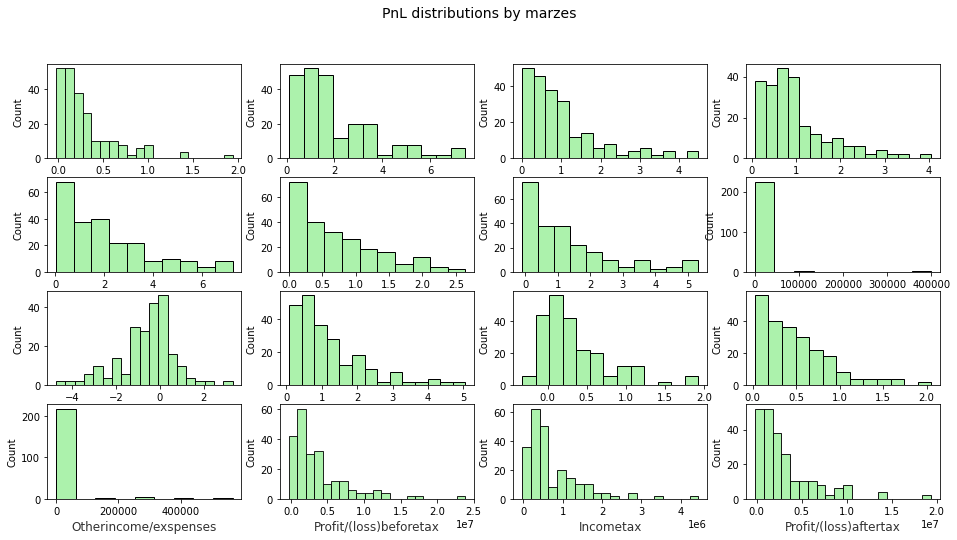

In [45]:
f, axs = plt.subplots(4, 4, figsize = (16,8))
f.suptitle('PnL distributions by marzes', fontsize=14)

for i in range(0,4):
    for j in range(0,4):
        sns.histplot(df_new, x=PnL2[i][j],  color = 'lightgreen', ax=axs[i,j])
        axs[i,j].set_xlabel(PnL2[i][j],size = 12,alpha=0.8)        
plt.show()

In [46]:
Ratios = [['NPL (%)', 'ROA\n(Annualized)', 'ROE\n(Annualized)']]

In [47]:
Ratios2 = ['NPL (%)_r', 'ROA\n(Annualized)', 'ROE\n(Annualized)','Cost of credit risk_r']

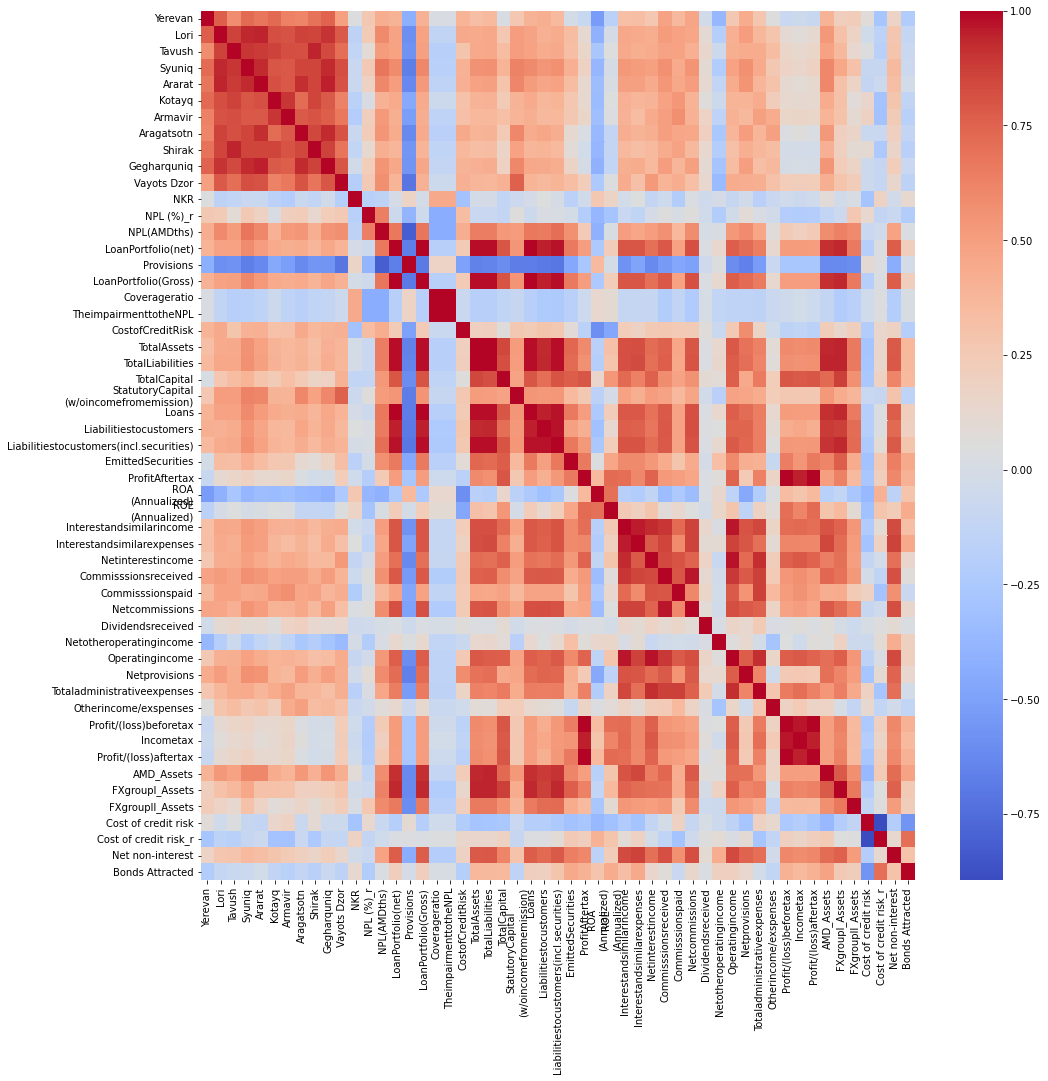

In [48]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
sns.heatmap(df_new.corr(), annot = False, cmap="coolwarm")
plt.show()

In [49]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


In [50]:
# Different scalers
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

#### MinMax scaler

In [51]:
df_sliced_dict = {}

for date in df['Date'].unique():
    scaler = MinMaxScaler()
    df0 = df[  df['Date'] == date ].drop(['Date','Banks name'], axis = 1)
    df_sliced_dict[date] = pd.DataFrame(scaler.fit_transform(df0),columns=df0.columns)

In [52]:
df_minmax = df[['Banks name']].join(pd.concat(df_sliced_dict).reset_index())
df_minmax

,Banks name,level_0,level_1,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,...,Profit/(loss)beforetax,Incometax,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted
0,Artsakh,2020-06-30,0,0.241379,0.000000,0.00,0.0,0.0,0.000000,0.000000,...,0.425116,0.453583,0.420063,0.250033,0.070121,0.058128,0.051392,0.846897,0.000657,0.560667
1,ASHB,2020-06-30,1,0.586207,1.000000,1.00,1.0,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.735241,0.187204,0.565432,1.000000,1.000000
2,Byblos,2020-06-30,2,0.068966,0.000000,0.00,0.0,0.0,0.000000,0.000000,...,0.035594,0.106359,0.023033,0.024871,0.060115,0.000000,0.382078,0.326445,0.027773,0.419145
3,Converse,2020-06-30,3,0.517241,0.166667,0.50,0.2,0.2,1.000000,1.000000,...,0.257169,0.450398,0.222868,0.220728,0.463836,0.528122,0.677545,0.124820,0.292779,0.244511
4,Econom,2020-06-30,4,1.000000,0.500000,0.25,0.4,0.4,0.833333,0.666667,...,0.504976,0.724546,0.466000,0.386907,0.209269,0.255142,0.482955,0.242901,0.158392,0.475901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,IDbank,2021-12-31,12,0.290323,0.166667,0.00,0.0,0.0,0.166667,0.250000,...,0.101307,0.119688,0.097147,0.160197,0.041014,0.613605,1.000000,0.000000,0.128857,0.046755
110,Ineco,2021-12-31,13,0.548387,0.333333,0.00,0.0,0.2,0.333333,0.250000,...,0.450013,0.438558,0.452605,0.441450,0.172746,0.330364,0.349144,0.313227,0.453444,0.339985
111,Mellat,2021-12-31,14,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,...,0.118225,0.111554,0.119734,0.000000,0.000000,0.022192,0.125362,0.630585,0.055037,0.093613
112,Uni,2021-12-31,15,1.000000,0.500000,0.25,0.6,0.4,0.333333,0.500000,...,0.000000,0.000000,0.000000,0.145368,0.149787,0.555881,0.261575,0.408522,0.257536,0.000000


In [53]:
cols = ['LoanPortfolio(net)','TotalAssets', 'TotalLiabilities', 'TotalCapital',       
       'Liabilitiestocustomers(incl.securities)','Bonds Attracted','Netinterestincome','Net non-interest',
        'Profit/(loss)aftertax','NPL (%)_r', 'ROA\n(Annualized)', 'ROE\n(Annualized)','Cost of credit risk_r']

In [54]:
df_minmax['Index'] = df_minmax[cols].sum(axis=1)

In [55]:
import datetime
df_minmax['Year'] = pd.to_datetime(df_minmax['level_0']).dt.year

In [56]:
df_minmax['Year'] = df_minmax.Year.astype('int32')

In [57]:
df_minmax[df_minmax['Year'] == 2013].sort_values(['Index'])

,Banks name,level_0,level_1,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,...,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted,Index,Year


In [58]:
df_minmax[df_minmax['level_0'] == df_minmax['level_0'][0]].sort_values(['Index'])

,Banks name,level_0,level_1,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,...,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted,Index,Year
2,Byblos,2020-06-30,2,0.068966,0.000000,0.00,0.0,0.0,0.000000,0.000000,...,0.023033,0.024871,0.060115,0.000000,0.382078,0.326445,0.027773,0.419145,1.447905,2020
7,IDbank,2020-06-30,7,0.310345,0.166667,0.00,0.0,0.0,0.166667,0.333333,...,0.019763,0.136200,0.087316,1.000000,0.747842,0.091772,0.036331,0.382758,1.898685,2020
5,Evoca,2020-06-30,5,0.310345,0.166667,0.00,0.0,0.0,0.166667,0.000000,...,0.078266,0.158795,0.165038,0.169429,0.452138,0.266391,0.038227,0.000000,2.004349,2020
10,Uni,2020-06-30,10,1.000000,0.666667,0.25,0.6,0.4,0.333333,0.666667,...,0.000000,0.221845,0.207367,0.756943,0.415363,0.296669,0.057080,0.037482,2.718179,2020
9,Mellat,2020-06-30,9,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,...,0.104131,0.000000,0.000000,0.008752,0.000000,1.000000,0.000000,0.276863,2.912419,2020
6,HSBC,2020-06-30,6,0.241379,0.000000,0.00,0.0,0.0,0.000000,0.000000,...,0.139512,0.162707,0.222196,0.743785,1.000000,0.000000,0.174735,0.209272,3.006129,2020
3,Converse,2020-06-30,3,0.517241,0.166667,0.50,0.2,0.2,1.000000,1.000000,...,0.222868,0.220728,0.463836,0.528122,0.677545,0.124820,0.292779,0.244511,4.004216,2020
4,Econom,2020-06-30,4,1.000000,0.500000,0.25,0.4,0.4,0.833333,0.666667,...,0.466000,0.386907,0.209269,0.255142,0.482955,0.242901,0.158392,0.475901,4.659950,2020
0,Artsakh,2020-06-30,0,0.241379,0.000000,0.00,0.0,0.0,0.000000,0.000000,...,0.420063,0.250033,0.070121,0.058128,0.051392,0.846897,0.000657,0.560667,4.697261,2020
11,VTB,2020-06-30,11,0.931034,0.833333,1.00,1.0,0.8,0.833333,1.000000,...,0.354394,0.473491,0.196790,0.717577,0.356491,0.351051,0.006369,0.075696,5.058915,2020


In [59]:
df_minmax.to_csv('./data/df_minmax.csv')

#### Z score

In [60]:
df_sliced_dict = {}

for date in df['Date'].unique():
    scaler = StandardScaler()
    df0 = df[  df['Date'] == date ].drop(['Date','Banks name'], axis = 1)
    df_sliced_dict[date] = pd.DataFrame(scaler.fit_transform(df0),columns=df0.columns)

In [61]:
df_zscore = df[['Banks name']].join(pd.concat(df_sliced_dict).reset_index())
df_zscore

,Banks name,level_0,level_1,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,...,Profit/(loss)beforetax,Incometax,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted
0,Artsakh,2020-06-30,0,-0.722636,-0.949312,-0.679366,-0.707107,-0.762493,-0.989949,-1.013606,...,0.516955,0.347809,0.541059,-0.158043,-0.702484,-1.105490,-1.285742,1.577645,-0.619363,0.792010
1,ASHB,2020-06-30,1,0.309701,2.022446,2.038099,1.944544,2.287479,1.555635,1.419048,...,2.624995,2.294905,2.651530,2.753206,2.935455,0.900724,-0.800861,0.605577,3.118892,2.444093
2,Byblos,2020-06-30,2,-1.238804,-0.949312,-0.679366,-0.707107,-0.762493,-0.989949,-1.013606,...,-0.911381,-0.889484,-0.903787,-1.032086,-0.741629,-1.277718,-0.105111,-0.219790,-0.517930,0.259825
3,Converse,2020-06-30,3,0.103234,-0.454019,0.679366,-0.176777,-0.152499,1.555635,1.419048,...,-0.098890,0.336460,-0.176557,-0.271801,0.837835,0.287050,0.949777,-0.916121,0.473380,-0.396874
4,Econom,2020-06-30,4,1.548505,0.536567,0.000000,0.353553,0.457496,1.131371,0.608164,...,0.809795,1.313356,0.708233,0.373278,-0.158098,-0.521759,0.255043,-0.508315,-0.029323,0.473255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,IDbank,2021-12-31,12,-0.634198,-0.541736,-0.842090,-0.908440,-0.857143,-0.679057,-0.240008,...,-0.556209,-0.518272,-0.562914,-0.686214,-0.790751,0.847229,1.590570,-0.977433,-0.637065,-0.689131
110,Ineco,2021-12-31,13,0.164422,-0.030096,-0.842090,-0.908440,-0.250000,-0.235058,-0.240008,...,0.748716,0.706937,0.755713,0.251203,-0.278081,-0.231299,-0.681297,0.266157,0.561447,0.392658
111,Mellat,2021-12-31,14,-1.532645,-1.053376,-0.842090,-0.908440,-0.857143,-1.123056,-1.056034,...,-0.492899,-0.549524,-0.479124,-1.220152,-0.950369,-1.404762,-1.462429,1.526149,-0.909640,-0.516261
112,Uni,2021-12-31,15,1.562006,0.481543,-0.219676,0.746219,0.357143,-0.235058,0.576018,...,-0.935319,-0.978154,-0.923298,-0.735639,-0.367432,0.627427,-0.986966,0.644502,-0.161930,-0.861620


In [62]:
df_zscore['Index'] = df_zscore[cols].sum(axis=1)

In [63]:
import datetime
df_zscore['Year'] = pd.to_datetime(df_zscore['level_0']).dt.year

In [64]:
df_zscore['Year'] = df_zscore.Year.astype('int32')

In [65]:
df_zscore[df_zscore['Year'] == 2013].sort_values(['Index'])

,Banks name,level_0,level_1,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,...,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted,Index,Year


In [66]:
df_zscore[df_zscore['level_0'] == df_zscore['level_0'][0]].sort_values(['Index'])

,Banks name,level_0,level_1,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,...,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted,Index,Year
2,Byblos,2020-06-30,2,-1.238804,-0.949312,-0.679366,-0.707107,-0.762493,-0.989949,-1.013606,...,-0.903787,-1.032086,-0.741629,-1.277718,-0.105111,-0.219790,-0.517930,0.259825,-9.823756,2020
7,IDbank,2020-06-30,7,-0.516168,-0.454019,-0.679366,-0.707107,-0.762493,-0.565685,-0.202721,...,-0.915685,-0.599925,-0.635214,1.685175,1.200757,-1.030255,-0.485916,0.122995,-7.949015,2020
5,Evoca,2020-06-30,5,-0.516168,-0.454019,-0.679366,-0.707107,-0.762493,-0.565685,-1.013606,...,-0.702785,-0.512216,-0.331142,-0.775719,0.145019,-0.427190,-0.478826,-1.316341,-7.834885,2020
10,Uni,2020-06-30,10,1.548505,1.031860,0.000000,0.883883,0.457496,-0.141421,0.608164,...,-0.987606,-0.267465,-0.165539,0.965022,0.013726,-0.322622,-0.408300,-1.175392,-5.024476,2020
9,Mellat,2020-06-30,9,-1.445272,-0.949312,-0.679366,-0.707107,-0.762493,-0.989949,-1.013606,...,-0.608659,-1.128632,-0.976816,-1.251787,-1.469224,2.106402,-0.621820,-0.275217,-4.609135,2020
6,HSBC,2020-06-30,6,-0.722636,-0.949312,-0.679366,-0.707107,-0.762493,-0.989949,-1.013606,...,-0.479902,-0.497030,-0.107525,0.926038,2.101022,-1.347200,0.031812,-0.529386,-4.015353,2020
3,Converse,2020-06-30,3,0.103234,-0.454019,0.679366,-0.176777,-0.152499,1.555635,1.419048,...,-0.176557,-0.271801,0.837835,0.287050,0.949777,-0.916121,0.473380,-0.396874,-0.182686,2020
4,Econom,2020-06-30,4,1.548505,0.536567,0.000000,0.353553,0.457496,1.131371,0.608164,...,0.708233,0.373278,-0.158098,-0.521759,0.255043,-0.508315,-0.029323,0.473255,1.585667,2020
0,Artsakh,2020-06-30,0,-0.722636,-0.949312,-0.679366,-0.707107,-0.762493,-0.989949,-1.013606,...,0.541059,-0.158043,-0.702484,-1.105490,-1.285742,1.577645,-0.619363,0.792010,1.648286,2020
11,VTB,2020-06-30,11,1.342038,1.527153,2.038099,1.944544,1.677484,1.131371,1.419048,...,0.302082,0.709384,-0.206920,0.848387,-0.196462,-0.134808,-0.597997,-1.031690,3.331109,2020


In [67]:
df_zscore.to_csv('./data/df_zscore.csv')

#### robust scaling (IQR)

In [68]:
df_sliced_dict = {}

for date in df['Date'].unique():
    scaler = RobustScaler()
    df0 = df[  df['Date'] == date ].drop(['Date','Banks name'], axis = 1)
    df_sliced_dict[date] = pd.DataFrame(scaler.fit_transform(df0),columns=df0.columns)

In [69]:
df_iqr = df[['Banks name']].join(pd.concat(df_sliced_dict).reset_index())
df_iqr

,Banks name,level_0,level_1,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,...,Profit/(loss)beforetax,Incometax,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted
0,Artsakh,2020-06-30,0,-0.400000,-0.307692,0.0,0.000000,-0.25,-0.3,-0.444444,...,0.642688,0.662954,0.667734,0.114813,-0.813759,-0.559782,-1.007059,1.517169,-0.295139,0.743202
1,ASHB,2020-06-30,1,0.400000,1.538462,3.2,2.222222,2.25,0.9,0.888889,...,2.287552,2.359471,2.288868,3.110126,4.920634,0.576745,-0.613281,0.719490,5.980746,2.157556
2,Byblos,2020-06-30,2,-0.800000,-0.307692,0.0,0.000000,-0.25,-0.3,-0.444444,...,-0.471816,-0.415106,-0.442108,-0.784469,-0.875464,-0.657350,-0.048254,0.042192,-0.124849,0.287596
3,Converse,2020-06-30,3,0.240000,0.000000,1.6,0.444444,0.25,0.9,0.888889,...,0.162156,0.653066,0.116505,-0.002231,1.614207,0.229096,0.808432,-0.529218,1.539389,-0.274606
4,Econom,2020-06-30,4,1.360000,0.615385,0.8,0.888889,0.75,0.7,0.444444,...,0.871185,1.504242,0.796147,0.661476,0.044343,-0.229096,0.244231,-0.194572,0.695438,0.470314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,IDbank,2021-12-31,12,-0.400000,0.000000,-0.5,-0.333333,-0.50,-0.2,0.000000,...,-0.119931,0.000000,-0.136150,-0.333924,-0.758128,0.659122,1.076992,-0.712589,-0.233040,-0.228332
110,Ineco,2021-12-31,13,0.133333,0.333333,-0.5,-0.333333,0.00,0.0,0.000000,...,0.971857,1.084626,0.957104,0.519090,0.163698,-0.067595,-0.300877,0.391583,0.892557,0.765270
111,Mellat,2021-12-31,14,-1.000000,-0.333333,-0.5,-0.333333,-0.50,-0.4,-0.500000,...,-0.066962,-0.027666,-0.066681,-0.819789,-1.045135,-0.858279,-0.774627,1.510317,-0.489032,-0.069554
112,Uni,2021-12-31,15,1.066667,0.666667,0.0,0.666667,0.50,0.0,0.500000,...,-0.437121,-0.407115,-0.434939,-0.378900,0.003038,0.511018,-0.486262,0.727511,0.213189,-0.386760


In [70]:
df_iqr['Index'] = df_iqr[cols].sum(axis=1)

In [71]:
import datetime
df_iqr['Year'] = pd.to_datetime(df_iqr['level_0']).dt.year

In [72]:
df_iqr['Year'] = df_iqr.Year.astype('int32')

In [73]:
df_iqr[df_iqr['Year'] == 2013].sort_values(['Index'])

,Banks name,level_0,level_1,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,...,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted,Index,Year


In [74]:
df_iqr[df_iqr['level_0'] == df_iqr['level_0'][0]].sort_values(['Index'])

,Banks name,level_0,level_1,Yerevan,Lori,Tavush,Syuniq,Ararat,Kotayq,Armavir,...,Profit/(loss)aftertax,AMD_Assets,FXgroupI_Assets,FXgroupII_Assets,Cost of credit risk,Cost of credit risk_r,Net non-interest,Bonds Attracted,Index,Year
2,Byblos,2020-06-30,2,-0.80,-0.307692,0.0,0.000000,-0.25,-0.3,-0.444444,...,-0.442108,-0.784469,-0.875464,-0.657350,-0.048254,0.042192,-0.124849,0.287596,-7.020597,2020
5,Evoca,2020-06-30,5,-0.24,0.000000,0.0,0.000000,-0.25,-0.1,-0.444444,...,-0.287710,-0.249587,-0.228422,-0.372966,0.154879,-0.128001,-0.059200,-1.061765,-4.411343,2020
7,IDbank,2020-06-30,7,-0.24,0.000000,0.0,0.000000,-0.25,-0.1,0.000000,...,-0.451247,-0.339829,-0.707724,1.021139,1.012256,-0.622876,-0.071104,0.170456,-4.355780,2020
9,Mellat,2020-06-30,9,-0.96,-0.307692,0.0,0.000000,-0.25,-0.3,-0.444444,...,-0.215409,-0.883802,-1.246183,-0.642660,-1.156067,1.951068,-0.299264,-0.170456,-2.291404,2020
10,Uni,2020-06-30,10,1.36,0.923077,0.8,1.333333,0.75,0.1,0.444444,...,-0.506492,0.002231,0.032613,0.613170,0.048254,-0.042192,0.059200,-0.941098,1.089397,2020
6,HSBC,2020-06-30,6,-0.40,-0.307692,0.0,0.000000,-0.25,-0.3,-0.444444,...,-0.116505,-0.233963,0.124060,0.591085,1.743372,-0.882962,0.798073,-0.388050,1.109272,2020
0,Artsakh,2020-06-30,0,-0.40,-0.307692,0.0,0.000000,-0.25,-0.3,-0.444444,...,0.667734,0.114813,-0.813759,-0.559782,-1.007059,1.517169,-0.295139,0.743202,3.633765,2020
4,Econom,2020-06-30,4,1.36,0.615385,0.8,0.888889,0.75,0.7,0.444444,...,0.796147,0.661476,0.044343,-0.229096,0.244231,-0.194572,0.695438,0.470314,4.687222,2020
3,Converse,2020-06-30,3,0.24,0.000000,1.6,0.444444,0.25,0.9,0.888889,...,0.116505,-0.002231,1.614207,0.229096,0.808432,-0.529218,1.539389,-0.274606,4.868193,2020
11,VTB,2020-06-30,11,1.20,1.230769,3.2,2.222222,1.75,0.7,0.888889,...,0.484166,1.007287,-0.032613,0.547096,-0.122442,0.111929,-0.259268,-0.818074,8.141357,2020


In [75]:
df_iqr.to_csv('./data/df_iqr.csv')

In [76]:
from sklearn.decomposition import PCA

In [77]:
cols2 = ['LoanPortfolio(net)',
 'TotalAssets',
 'TotalLiabilities',
 'TotalCapital',
 'Liabilitiestocustomers(incl.securities)',
 'Bonds Attracted',
 'Netinterestincome',
 'Net non-interest',
 'Profit/(loss)aftertax',
 'NPL (%)_r',
 'ROA\n(Annualized)',
 'ROE\n(Annualized)',
 'Cost of credit risk_r',
        'Year']

In [78]:
dfminmax= df_minmax[cols2]

In [79]:
# dfminmax = df_minmax.drop(['Index','level_0','level_1','Banks name','AMD_Assets','FXgroupI_Assets','FXgroupII_Assets'], axis =1)

In [80]:
dfminmax

,LoanPortfolio(net),TotalAssets,TotalLiabilities,TotalCapital,Liabilitiestocustomers(incl.securities),Bonds Attracted,Netinterestincome,Net non-interest,Profit/(loss)aftertax,NPL (%)_r,ROA\n(Annualized),ROE\n(Annualized),Cost of credit risk_r,Year
0,0.175115,0.162028,0.164754,0.273286,0.201695,0.560667,0.284957,0.000657,0.420063,0.000000,0.750000,0.857143,0.846897,2020
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.185217,0.500000,1.000000,0.565432,2020
2,0.033415,0.041758,0.058030,0.000000,0.096200,0.419145,0.000000,0.027773,0.023033,0.100680,0.250000,0.071429,0.326445,2020
3,0.387716,0.340854,0.349871,0.340093,0.451863,0.244511,0.458181,0.292779,0.222868,0.183517,0.250000,0.357143,0.124820,2020
4,0.315975,0.300657,0.315200,0.235925,0.217495,0.475901,0.429379,0.158392,0.466000,0.002124,0.500000,1.000000,0.242901,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.153631,0.113291,0.120439,0.166596,0.163227,0.046755,0.176748,0.128857,0.097147,0.468557,0.333333,0.266667,0.000000,2021
110,0.304396,0.338729,0.352949,0.295210,0.356467,0.339985,0.443332,0.453444,0.452605,0.096178,0.666667,1.000000,0.313227,2021
111,0.000000,0.000000,0.000000,0.135647,0.000000,0.093613,0.044762,0.055037,0.119734,0.219482,1.000000,0.333333,0.630585,2021
112,0.178390,0.170354,0.195369,0.048536,0.281817,0.000000,0.194538,0.257536,0.000000,1.000000,0.000000,0.000000,0.408522,2021


In [81]:
df_sliced_dict = {}

for date in dfminmax['Year'].unique():
    dfminmax0 = dfminmax.drop('Year', axis = 1)
    pca = PCA(n_components=13, random_state=1)
    df_sliced_dict[date] = pd.DataFrame(pca.fit_transform(dfminmax0))

In [82]:
n = 0

for date in dfminmax['Year'].unique():
    dfminmax0 = dfminmax.drop('Year', axis = 1)
    pca = PCA(n_components=13, random_state=1)
    data_pca = pd.DataFrame(pca.fit_transform(dfminmax0))
    sum = 0
    for ix, i in enumerate(pca.explained_variance_ratio_):
      sum = sum + i
      if(sum>0.70):
        n = ix+1
        break    
#    new_df = pd.DataFrame(abs(pca.components_[:n,:]),columns=dfminmax0.columns)
    for i in range(n):
        dfminmax0['Index'] = pca.explained_variance_ratio_[i]*data_pca[i]
#    dfminmax0['Index'] = 
    df_sliced_dict[date] = dfminmax0

In [83]:
n

2

In [84]:
df_pca = df_minmax[['Banks name']].join(pd.concat(df_sliced_dict).reset_index())
df_pca = df_pca.drop('level_0',axis = 1)
df_pca = df_minmax[['level_0']].join(df_pca)
df_pca

,level_0,Banks name,level_1,LoanPortfolio(net),TotalAssets,TotalLiabilities,TotalCapital,Liabilitiestocustomers(incl.securities),Bonds Attracted,Netinterestincome,Net non-interest,Profit/(loss)aftertax,NPL (%)_r,ROA\n(Annualized),ROE\n(Annualized),Cost of credit risk_r,Index
0,2020-06-30,Artsakh,0,0.175115,0.162028,0.164754,0.273286,0.201695,0.560667,0.284957,0.000657,0.420063,0.000000,0.750000,0.857143,0.846897,0.201148
1,2020-06-30,ASHB,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.185217,0.500000,1.000000,0.565432,0.082973
2,2020-06-30,Byblos,2,0.033415,0.041758,0.058030,0.000000,0.096200,0.419145,0.000000,0.027773,0.023033,0.100680,0.250000,0.071429,0.326445,0.001755
3,2020-06-30,Converse,3,0.387716,0.340854,0.349871,0.340093,0.451863,0.244511,0.458181,0.292779,0.222868,0.183517,0.250000,0.357143,0.124820,-0.039156
4,2020-06-30,Econom,4,0.315975,0.300657,0.315200,0.235925,0.217495,0.475901,0.429379,0.158392,0.466000,0.002124,0.500000,1.000000,0.242901,0.122742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2021-12-31,IDbank,109,0.153631,0.113291,0.120439,0.166596,0.163227,0.046755,0.176748,0.128857,0.097147,0.468557,0.333333,0.266667,0.000000,-0.041691
110,2021-12-31,Ineco,110,0.304396,0.338729,0.352949,0.295210,0.356467,0.339985,0.443332,0.453444,0.452605,0.096178,0.666667,1.000000,0.313227,0.119539
111,2021-12-31,Mellat,111,0.000000,0.000000,0.000000,0.135647,0.000000,0.093613,0.044762,0.055037,0.119734,0.219482,1.000000,0.333333,0.630585,0.125855
112,2021-12-31,Uni,112,0.178390,0.170354,0.195369,0.048536,0.281817,0.000000,0.194538,0.257536,0.000000,1.000000,0.000000,0.000000,0.408522,-0.132194


In [85]:
# df_pca[df_pca['Year'] == 2013].sort_values(['Index'])

In [86]:
df_pca[df_pca['level_0'] == df_pca['level_0'][0]].sort_values(['Index'])

,level_0,Banks name,level_1,LoanPortfolio(net),TotalAssets,TotalLiabilities,TotalCapital,Liabilitiestocustomers(incl.securities),Bonds Attracted,Netinterestincome,Net non-interest,Profit/(loss)aftertax,NPL (%)_r,ROA\n(Annualized),ROE\n(Annualized),Cost of credit risk_r,Index
10,2020-06-30,Uni,10,0.251552,0.218769,0.240590,0.074835,0.301908,0.037482,0.239294,0.057080,0.000000,1.000000,0.00,0.000000,0.296669,-0.139644
6,2020-06-30,HSBC,6,0.215087,0.195647,0.203426,0.236141,0.294235,0.209272,0.273473,0.174735,0.139512,0.528887,0.25,0.285714,0.000000,-0.053618
3,2020-06-30,Converse,3,0.387716,0.340854,0.349871,0.340093,0.451863,0.244511,0.458181,0.292779,0.222868,0.183517,0.25,0.357143,0.124820,-0.039156
7,2020-06-30,IDbank,7,0.135175,0.118509,0.120144,0.251381,0.155066,0.382758,0.237955,0.036331,0.019763,0.099830,0.25,0.000000,0.091772,-0.035603
5,2020-06-30,Evoca,5,0.183054,0.162122,0.181978,0.053320,0.205560,0.000000,0.201162,0.038227,0.078266,0.098556,0.25,0.285714,0.266391,-0.023094
2,2020-06-30,Byblos,2,0.033415,0.041758,0.058030,0.000000,0.096200,0.419145,0.000000,0.027773,0.023033,0.100680,0.25,0.071429,0.326445,0.001755
11,2020-06-30,VTB,11,0.346105,0.341949,0.348263,0.375718,0.456834,0.075696,0.821336,0.006369,0.354394,0.509771,0.50,0.571429,0.351051,0.011553
8,2020-06-30,Ineco,8,0.389994,0.385030,0.385381,0.487874,0.411840,0.518307,0.741723,0.202425,0.428586,0.146134,0.50,0.571429,0.568646,0.073213
1,2020-06-30,ASHB,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.185217,0.50,1.000000,0.565432,0.082973
4,2020-06-30,Econom,4,0.315975,0.300657,0.315200,0.235925,0.217495,0.475901,0.429379,0.158392,0.466000,0.002124,0.50,1.000000,0.242901,0.122742


In [87]:
df_pca['Month'] = pd.to_datetime(df_pca['level_0']).dt.month
df_pca['Year'] = pd.to_datetime(df_pca['level_0']).dt.year

In [88]:
df_pca['Year'] = df_pca.Year.astype('int32')
df_pca['Month'] = df_pca.Month.astype('int32')

In [89]:
df_pca[(df_pca['Year'] == 2021) & (df_pca['Month'] == 12)].sort_values(['Index'])

,level_0,Banks name,level_1,LoanPortfolio(net),TotalAssets,TotalLiabilities,TotalCapital,Liabilitiestocustomers(incl.securities),Bonds Attracted,Netinterestincome,Net non-interest,Profit/(loss)aftertax,NPL (%)_r,ROA\n(Annualized),ROE\n(Annualized),Cost of credit risk_r,Index,Month,Year
97,2021-12-31,ABB,97,0.889591,0.789953,0.852749,0.230130,0.797145,0.610458,0.325609,0.622914,0.007166,0.107891,0.000000,0.000000,0.369603,-0.144915,12,2021
112,2021-12-31,Uni,112,0.178390,0.170354,0.195369,0.048536,0.281817,0.000000,0.194538,0.257536,0.000000,1.000000,0.000000,0.000000,0.408522,-0.132194,12,2021
113,2021-12-31,VTB,113,0.290026,0.274677,0.292280,0.208146,0.401229,0.019715,0.533588,0.000000,0.061442,0.248459,0.000000,0.133333,0.202144,-0.101734,12,2021
108,2021-12-31,HSBC,108,0.200303,0.175786,0.188067,0.172530,0.273864,0.080364,0.246255,0.303916,0.148518,0.705302,0.333333,0.400000,0.055399,-0.045227,12,2021
107,2021-12-31,Evoca,107,0.179248,0.160353,0.185435,0.039261,0.217862,0.044867,0.095562,0.195160,0.038236,0.043157,0.333333,0.133333,0.068476,-0.042107,12,2021
109,2021-12-31,IDbank,109,0.153631,0.113291,0.120439,0.166596,0.163227,0.046755,0.176748,0.128857,0.097147,0.468557,0.333333,0.266667,0.000000,-0.041691,12,2021
105,2021-12-31,Converse,105,0.324471,0.290450,0.308325,0.219238,0.387383,0.150220,0.306270,0.417226,0.195946,0.368681,0.333333,0.466667,0.061176,-0.032736,12,2021
100,2021-12-31,Ararat,100,0.191254,0.184439,0.205508,0.097680,0.176581,0.132255,0.152159,0.196058,0.068271,0.070900,0.333333,0.200000,0.086678,-0.028008,12,2021
104,2021-12-31,Byblos,104,0.026102,0.017742,0.033858,0.000000,0.080536,0.024795,0.000000,0.067980,0.041134,0.067818,0.333333,0.200000,0.027338,-0.015778,12,2021
106,2021-12-31,Econom,106,0.304786,0.273487,0.298658,0.136217,0.194130,0.114140,0.239030,0.150303,0.141415,0.000000,0.333333,0.400000,0.067318,-0.011468,12,2021


In [90]:
df_pca[(df_pca['Year'] == 2019) & (df_pca['Month'] == 12)].sort_values(['Index'])

,level_0,Banks name,level_1,LoanPortfolio(net),TotalAssets,TotalLiabilities,TotalCapital,Liabilitiestocustomers(incl.securities),Bonds Attracted,Netinterestincome,Net non-interest,Profit/(loss)aftertax,NPL (%)_r,ROA\n(Annualized),ROE\n(Annualized),Cost of credit risk_r,Index,Month,Year


In [91]:
df_pca['Y-M'] = df_pca['Year'].astype('str') + "_" + df_pca['Month'].astype('str')

In [92]:
list(df_pca['Y-M'].unique())

['2020_6', '2020_9', '2020_12', '2021_3', '2021_6', '2021_9', '2021_12']

In [93]:
df_pca.to_csv('./data/df_pca.csv')

In [94]:
#armenia_border = json.load(open("./data/gadm36_ARM_1 (1).json"))
#armenia_border

In [95]:
df_melted = pd.melt(df, id_vars=['Date', 'Banks name'], value_vars=['Yerevan', 'Lori', 'Tavush', 'Syuniq', 'Ararat',
       'Kotayq', 'Armavir', 'Aragatsotn', 'Shirak', 'Gegharquniq',
       'Vayots Dzor', 'NKR'])
df_melted

,Date,Banks name,variable,value
0,2020-06-30,Artsakh,Yerevan,8
1,2020-06-30,ASHB,Yerevan,18
2,2020-06-30,Byblos,Yerevan,3
3,2020-06-30,Converse,Yerevan,16
4,2020-06-30,Econom,Yerevan,30
...,...,...,...,...
1363,2021-12-31,IDbank,NKR,0
1364,2021-12-31,Ineco,NKR,0
1365,2021-12-31,Mellat,NKR,0
1366,2021-12-31,Uni,NKR,2


In [96]:
lonlat = pd.read_excel('./data/LonLat.xlsx')

In [97]:
df_melted = df_melted.merge(lonlat, on='variable', how='left')

In [98]:
df_melted['Year'] = df_melted['Date'].dt.year
df_melted['Month'] = df_melted['Date'].dt.month
df_melted['Y-M'] = df_melted['Year'].astype('str') + "_" + df_melted['Month'].astype('str')
df_melted

,Date,Banks name,variable,value,Lat,Lon,Year,Month,Y-M
0,2020-06-30,Artsakh,Yerevan,8,40.18562,44.39081,2020,6,2020_6
1,2020-06-30,ASHB,Yerevan,18,40.18562,44.39081,2020,6,2020_6
2,2020-06-30,Byblos,Yerevan,3,40.18562,44.39081,2020,6,2020_6
3,2020-06-30,Converse,Yerevan,16,40.18562,44.39081,2020,6,2020_6
4,2020-06-30,Econom,Yerevan,30,40.18562,44.39081,2020,6,2020_6
...,...,...,...,...,...,...,...,...,...
1363,2021-12-31,IDbank,NKR,0,39.81649,46.71448,2021,12,2021_12
1364,2021-12-31,Ineco,NKR,0,39.81649,46.71448,2021,12,2021_12
1365,2021-12-31,Mellat,NKR,0,39.81649,46.71448,2021,12,2021_12
1366,2021-12-31,Uni,NKR,2,39.81649,46.71448,2021,12,2021_12


In [99]:
df_melted.to_csv('./data/df_melted.csv')

In [100]:
# df_melted1 = df_melted[(df_melted['Year'] == 2013)&(df_melted['Month'] == 12) & (df_melted['Banks name'] == 'ABB')]

In [101]:
# df_melted1

In [102]:
# m = folium.Map(location=[40.2, 44.6],zoom_start=8)

# for lat, lon, bank, value, variable in zip(df_melted1['Lat'], df_melted1['Lon'], df_melted1['Banks name'], df_melted1['value'], df_melted1['variable']):
#     folium.CircleMarker(
#         [lat, lon],
#         radius=value,
#          popup = ('#: ' + str(value)
#                  ),
#         color='b',
#         key_on = bank,
#         threshold_scale=[0,1,2,3],
#         fill_color='red',
#         fill=True,
#         fill_opacity=0.7
#         ).add_to(m)
# m

### PnL PC

In [103]:
dfminmax_bs = df_minmax[['LoanPortfolio(net)',
 'TotalAssets',
 'TotalLiabilities',
 'TotalCapital',
 'Liabilitiestocustomers(incl.securities)',
 'Bonds Attracted','Year']]
dfminmax_pnl = df_minmax[['Netinterestincome', 'Net non-interest', 'Profit/(loss)aftertax','Year']]
dfminmax_ratios = df_minmax[['NPL (%)_r',
 'ROA\n(Annualized)',
 'ROE\n(Annualized)',
 'Cost of credit risk_r','Year']]

In [104]:
dfminmax_pnl

,Netinterestincome,Net non-interest,Profit/(loss)aftertax,Year
0,0.284957,0.000657,0.420063,2020
1,1.000000,1.000000,1.000000,2020
2,0.000000,0.027773,0.023033,2020
3,0.458181,0.292779,0.222868,2020
4,0.429379,0.158392,0.466000,2020
...,...,...,...,...
109,0.176748,0.128857,0.097147,2021
110,0.443332,0.453444,0.452605,2021
111,0.044762,0.055037,0.119734,2021
112,0.194538,0.257536,0.000000,2021


In [105]:
df_sliced_dict_pnl = {}

for date in dfminmax_pnl['Year'].unique():
    dfminmax0 = dfminmax_pnl.drop('Year', axis = 1)
    pca = PCA(n_components=3, random_state=1)
    df_sliced_dict_pnl[date] = pd.DataFrame(pca.fit_transform(dfminmax0))

In [106]:
n = 0

for date in dfminmax_pnl['Year'].unique():
    dfminmax0 = dfminmax_pnl.drop('Year', axis = 1)
    pca = PCA(n_components=3, random_state=1)
    data_pca = pd.DataFrame(pca.fit_transform(dfminmax0))
    sum = 0
    for ix, i in enumerate(pca.explained_variance_ratio_):
      sum = sum + i
      if(sum>0.70):
        n = ix+1
        break    
#    new_df = pd.DataFrame(abs(pca.components_[:n,:]),columns=dfminmax0.columns)
    for i in range(n):
        dfminmax0['Index'] = pca.explained_variance_ratio_[i]*data_pca[i]
#    dfminmax0['Index'] = 
    df_sliced_dict_pnl[date] = dfminmax0

In [107]:
n

1

In [108]:
df_pca_pnl = df_minmax[['Banks name']].join(pd.concat(df_sliced_dict_pnl).reset_index())
df_pca_pnl = df_pca_pnl.drop('level_0',axis = 1)
df_pca_pnl = df_minmax[['level_0']].join(df_pca_pnl)
df_pca_pnl

,level_0,Banks name,level_1,Netinterestincome,Net non-interest,Profit/(loss)aftertax,Index
0,2020-06-30,Artsakh,0,0.284957,0.000657,0.420063,-0.090274
1,2020-06-30,ASHB,1,1.000000,1.000000,1.000000,0.928185
2,2020-06-30,Byblos,2,0.000000,0.027773,0.023033,-0.375727
3,2020-06-30,Converse,3,0.458181,0.292779,0.222868,0.032404
4,2020-06-30,Econom,4,0.429379,0.158392,0.466000,0.064544
...,...,...,...,...,...,...,...
109,2021-12-31,IDbank,109,0.176748,0.128857,0.097147,-0.220096
110,2021-12-31,Ineco,110,0.443332,0.453444,0.452605,0.198378
111,2021-12-31,Mellat,111,0.044762,0.055037,0.119734,-0.301707
112,2021-12-31,Uni,112,0.194538,0.257536,0.000000,-0.196245


In [109]:
# df_pca[df_pca['Year'] == 2013].sort_values(['Index'])

In [110]:
df_pca_pnl[df_pca_pnl['level_0'] == df_pca_pnl['level_0'][0]].sort_values(['Index'])

,level_0,Banks name,level_1,Netinterestincome,Net non-interest,Profit/(loss)aftertax,Index
2,2020-06-30,Byblos,2,0.000000,0.027773,0.023033,-0.375727
9,2020-06-30,Mellat,9,0.038073,0.000000,0.104131,-0.336331
7,2020-06-30,IDbank,7,0.237955,0.036331,0.019763,-0.268677
10,2020-06-30,Uni,10,0.239294,0.057080,0.000000,-0.267284
5,2020-06-30,Evoca,5,0.201162,0.038227,0.078266,-0.258579
6,2020-06-30,HSBC,6,0.273473,0.174735,0.139512,-0.138415
0,2020-06-30,Artsakh,0,0.284957,0.000657,0.420063,-0.090274
3,2020-06-30,Converse,3,0.458181,0.292779,0.222868,0.032404
4,2020-06-30,Econom,4,0.429379,0.158392,0.466000,0.064544
11,2020-06-30,VTB,11,0.821336,0.006369,0.354394,0.119559


In [111]:
df_pca_pnl['Month'] = pd.to_datetime(df_pca_pnl['level_0']).dt.month
df_pca_pnl['Year'] = pd.to_datetime(df_pca_pnl['level_0']).dt.year

In [112]:
df_pca_pnl['Year'] = df_pca_pnl.Year.astype('int32')
df_pca_pnl['Month'] = df_pca_pnl.Month.astype('int32')

In [113]:
df_pca_pnl[(df_pca_pnl['Year'] == 2022) & (df_pca_pnl['Month'] == 3)].sort_values(['Index'])

,level_0,Banks name,level_1,Netinterestincome,Net non-interest,Profit/(loss)aftertax,Index,Month,Year


In [114]:
df_pca_pnl.to_csv('./data/df_pca_pnl.csv')

### BS PC

In [115]:
# dfminmax = df_minmax.drop(['Index','level_0','level_1','Banks name','AMD_Assets','FXgroupI_Assets','FXgroupII_Assets'], axis =1)

In [116]:
dfminmax_bs

,LoanPortfolio(net),TotalAssets,TotalLiabilities,TotalCapital,Liabilitiestocustomers(incl.securities),Bonds Attracted,Year
0,0.175115,0.162028,0.164754,0.273286,0.201695,0.560667,2020
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020
2,0.033415,0.041758,0.058030,0.000000,0.096200,0.419145,2020
3,0.387716,0.340854,0.349871,0.340093,0.451863,0.244511,2020
4,0.315975,0.300657,0.315200,0.235925,0.217495,0.475901,2020
...,...,...,...,...,...,...,...
109,0.153631,0.113291,0.120439,0.166596,0.163227,0.046755,2021
110,0.304396,0.338729,0.352949,0.295210,0.356467,0.339985,2021
111,0.000000,0.000000,0.000000,0.135647,0.000000,0.093613,2021
112,0.178390,0.170354,0.195369,0.048536,0.281817,0.000000,2021


In [117]:
df_sliced_dict_bs = {}

for date in dfminmax_bs['Year'].unique():
    dfminmax0 = dfminmax_bs.drop('Year', axis = 1)
    pca = PCA(n_components=6, random_state=1)
    df_sliced_dict_bs[date] = pd.DataFrame(pca.fit_transform(dfminmax0))

In [118]:
n = 0

for date in dfminmax_bs['Year'].unique():
    dfminmax0 = dfminmax_bs.drop('Year', axis = 1)
    pca = PCA(n_components=6, random_state=1)
    data_pca = pd.DataFrame(pca.fit_transform(dfminmax0))
    sum = 0
    for ix, i in enumerate(pca.explained_variance_ratio_):
      sum = sum + i
      if(sum>0.70):
        n = ix+1
        break    
#    new_df = pd.DataFrame(abs(pca.components_[:n,:]),columns=dfminmax0.columns)
    for i in range(n):
        dfminmax0['Index'] = pca.explained_variance_ratio_[i]*data_pca[i]
#    dfminmax0['Index'] = 
    df_sliced_dict_bs[date] = dfminmax0

In [119]:
n

1

In [120]:
df_pca_bs = df_minmax[['Banks name']].join(pd.concat(df_sliced_dict_bs).reset_index())
df_pca_bs = df_pca_bs.drop('level_0',axis = 1)
df_pca_bs = df_minmax[['level_0']].join(df_pca_bs)
df_pca_bs

,level_0,Banks name,level_1,LoanPortfolio(net),TotalAssets,TotalLiabilities,TotalCapital,Liabilitiestocustomers(incl.securities),Bonds Attracted,Index
0,2020-06-30,Artsakh,0,0.175115,0.162028,0.164754,0.273286,0.201695,0.560667,-0.198916
1,2020-06-30,ASHB,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.331064
2,2020-06-30,Byblos,2,0.033415,0.041758,0.058030,0.000000,0.096200,0.419145,-0.478533
3,2020-06-30,Converse,3,0.387716,0.340854,0.349871,0.340093,0.451863,0.244511,0.095036
4,2020-06-30,Econom,4,0.315975,0.300657,0.315200,0.235925,0.217495,0.475901,-0.047752
...,...,...,...,...,...,...,...,...,...,...
109,2021-12-31,IDbank,109,0.153631,0.113291,0.120439,0.166596,0.163227,0.046755,-0.354537
110,2021-12-31,Ineco,110,0.304396,0.338729,0.352949,0.295210,0.356467,0.339985,0.027668
111,2021-12-31,Mellat,111,0.000000,0.000000,0.000000,0.135647,0.000000,0.093613,-0.567398
112,2021-12-31,Uni,112,0.178390,0.170354,0.195369,0.048536,0.281817,0.000000,-0.290932


In [121]:
# df_pca[df_pca['Year'] == 2013].sort_values(['Index'])

In [122]:
df_pca_bs[df_pca_bs['level_0'] == df_pca_bs['level_0'][0]].sort_values(['Index'])

,level_0,Banks name,level_1,LoanPortfolio(net),TotalAssets,TotalLiabilities,TotalCapital,Liabilitiestocustomers(incl.securities),Bonds Attracted,Index
9,2020-06-30,Mellat,9,0.000000,0.000000,0.000000,0.174564,0.000000,0.276863,-0.532530
2,2020-06-30,Byblos,2,0.033415,0.041758,0.058030,0.000000,0.096200,0.419145,-0.478533
5,2020-06-30,Evoca,5,0.183054,0.162122,0.181978,0.053320,0.205560,0.000000,-0.323843
7,2020-06-30,IDbank,7,0.135175,0.118509,0.120144,0.251381,0.155066,0.382758,-0.294868
10,2020-06-30,Uni,10,0.251552,0.218769,0.240590,0.074835,0.301908,0.037482,-0.206335
0,2020-06-30,Artsakh,0,0.175115,0.162028,0.164754,0.273286,0.201695,0.560667,-0.198916
6,2020-06-30,HSBC,6,0.215087,0.195647,0.203426,0.236141,0.294235,0.209272,-0.177581
4,2020-06-30,Econom,4,0.315975,0.300657,0.315200,0.235925,0.217495,0.475901,-0.047752
11,2020-06-30,VTB,11,0.346105,0.341949,0.348263,0.375718,0.456834,0.075696,0.069302
3,2020-06-30,Converse,3,0.387716,0.340854,0.349871,0.340093,0.451863,0.244511,0.095036


In [123]:
df_pca_bs['Month'] = pd.to_datetime(df_pca_bs['level_0']).dt.month
df_pca_bs['Year'] = pd.to_datetime(df_pca_bs['level_0']).dt.year

In [124]:
df_pca_bs['Year'] = df_pca_bs.Year.astype('int32')
df_pca_bs['Month'] = df_pca_bs.Month.astype('int32')

In [125]:
df_pca_bs[(df_pca_bs['Year'] == 2021) & (df_pca_bs['Month'] == 12)].sort_values(['Index'])

,level_0,Banks name,level_1,LoanPortfolio(net),TotalAssets,TotalLiabilities,TotalCapital,Liabilitiestocustomers(incl.securities),Bonds Attracted,Index,Month,Year
111,2021-12-31,Mellat,111,0.000000,0.000000,0.000000,0.135647,0.000000,0.093613,-0.567398,12,2021
104,2021-12-31,Byblos,104,0.026102,0.017742,0.033858,0.000000,0.080536,0.024795,-0.556398,12,2021
109,2021-12-31,IDbank,109,0.153631,0.113291,0.120439,0.166596,0.163227,0.046755,-0.354537,12,2021
102,2021-12-31,Artsakh,102,0.023229,0.113860,0.118492,0.190664,0.136015,0.488617,-0.351727,12,2021
107,2021-12-31,Evoca,107,0.179248,0.160353,0.185435,0.039261,0.217862,0.044867,-0.318543,12,2021
112,2021-12-31,Uni,112,0.178390,0.170354,0.195369,0.048536,0.281817,0.000000,-0.290932,12,2021
100,2021-12-31,Ararat,100,0.191254,0.184439,0.205508,0.097680,0.176581,0.132255,-0.283394,12,2021
108,2021-12-31,HSBC,108,0.200303,0.175786,0.188067,0.172530,0.273864,0.080364,-0.239540,12,2021
106,2021-12-31,Econom,106,0.304786,0.273487,0.298658,0.136217,0.194130,0.114140,-0.153117,12,2021
113,2021-12-31,VTB,113,0.290026,0.274677,0.292280,0.208146,0.401229,0.019715,-0.076771,12,2021


In [126]:
df_pca_bs.to_csv('./data/df_pca_bs.csv')

### Ratios PC

In [127]:
# dfminmax = df_minmax.drop(['Index','level_0','level_1','Banks name','AMD_Assets','FXgroupI_Assets','FXgroupII_Assets'], axis =1)

In [128]:
dfminmax_ratios

,NPL (%)_r,ROA\n(Annualized),ROE\n(Annualized),Cost of credit risk_r,Year
0,0.000000,0.750000,0.857143,0.846897,2020
1,0.185217,0.500000,1.000000,0.565432,2020
2,0.100680,0.250000,0.071429,0.326445,2020
3,0.183517,0.250000,0.357143,0.124820,2020
4,0.002124,0.500000,1.000000,0.242901,2020
...,...,...,...,...,...
109,0.468557,0.333333,0.266667,0.000000,2021
110,0.096178,0.666667,1.000000,0.313227,2021
111,0.219482,1.000000,0.333333,0.630585,2021
112,1.000000,0.000000,0.000000,0.408522,2021


In [129]:
df_sliced_dict_ratios = {}

for date in dfminmax_ratios['Year'].unique():
    dfminmax0 = dfminmax_ratios.drop('Year', axis = 1)
    pca = PCA(n_components=4, random_state=1)
    df_sliced_dict_ratios[date] = pd.DataFrame(pca.fit_transform(dfminmax0))

In [130]:
n = 0

for date in dfminmax_ratios['Year'].unique():
    dfminmax0 = dfminmax_ratios.drop('Year', axis = 1)
    pca = PCA(n_components=4, random_state=1)
    data_pca = pd.DataFrame(pca.fit_transform(dfminmax0))
    sum = 0
    for ix, i in enumerate(pca.explained_variance_ratio_):
      sum = sum + i
      if(sum>0.70):
        n = ix+1
        break    
#    new_df = pd.DataFrame(abs(pca.components_[:n,:]),columns=dfminmax0.columns)
    for i in range(n):
        dfminmax0['Index'] = pca.explained_variance_ratio_[i]*data_pca[i]
#    dfminmax0['Index'] = 
    df_sliced_dict_ratios[date] = dfminmax0

In [131]:
n

2

In [132]:
df_pca_ratios = df_minmax[['Banks name']].join(pd.concat(df_sliced_dict_ratios).reset_index())
df_pca_ratios = df_pca_ratios.drop('level_0',axis = 1)
df_pca_ratios = df_minmax[['level_0']].join(df_pca_ratios)
df_pca_ratios

,level_0,Banks name,level_1,NPL (%)_r,ROA\n(Annualized),ROE\n(Annualized),Cost of credit risk_r,Index
0,2020-06-30,Artsakh,0,0.000000,0.750000,0.857143,0.846897,0.032658
1,2020-06-30,ASHB,1,0.185217,0.500000,1.000000,0.565432,0.023033
2,2020-06-30,Byblos,2,0.100680,0.250000,0.071429,0.326445,-0.018028
3,2020-06-30,Converse,3,0.183517,0.250000,0.357143,0.124820,-0.031281
4,2020-06-30,Econom,4,0.002124,0.500000,1.000000,0.242901,-0.041822
...,...,...,...,...,...,...,...,...
109,2021-12-31,IDbank,109,0.468557,0.333333,0.266667,0.000000,-0.006149
110,2021-12-31,Ineco,110,0.096178,0.666667,1.000000,0.313227,-0.019366
111,2021-12-31,Mellat,111,0.219482,1.000000,0.333333,0.630585,0.038684
112,2021-12-31,Uni,112,1.000000,0.000000,0.000000,0.408522,0.116665


In [133]:
# df_pca[df_pca['Year'] == 2013].sort_values(['Index'])

In [134]:
df_pca_ratios[df_pca_ratios['level_0'] == df_pca_ratios['level_0'][0]].sort_values(['Index'])

,level_0,Banks name,level_1,NPL (%)_r,ROA\n(Annualized),ROE\n(Annualized),Cost of credit risk_r,Index
7,2020-06-30,IDbank,7,0.099830,0.25,0.000000,0.091772,-0.046634
4,2020-06-30,Econom,4,0.002124,0.50,1.000000,0.242901,-0.041822
3,2020-06-30,Converse,3,0.183517,0.25,0.357143,0.124820,-0.031281
5,2020-06-30,Evoca,5,0.098556,0.25,0.285714,0.266391,-0.025857
2,2020-06-30,Byblos,2,0.100680,0.25,0.071429,0.326445,-0.018028
6,2020-06-30,HSBC,6,0.528887,0.25,0.285714,0.000000,0.001894
8,2020-06-30,Ineco,8,0.146134,0.50,0.571429,0.568646,0.018404
1,2020-06-30,ASHB,1,0.185217,0.50,1.000000,0.565432,0.023033
0,2020-06-30,Artsakh,0,0.000000,0.75,0.857143,0.846897,0.032658
11,2020-06-30,VTB,11,0.509771,0.50,0.571429,0.351051,0.042768


In [135]:
df_pca_ratios['Month'] = pd.to_datetime(df_pca_ratios['level_0']).dt.month
df_pca_ratios['Year'] = pd.to_datetime(df_pca_ratios['level_0']).dt.year

In [136]:
df_pca_ratios['Year'] = df_pca_ratios.Year.astype('int32')
df_pca_ratios['Month'] = df_pca_ratios.Month.astype('int32')

In [137]:
df_pca_ratios[(df_pca_ratios['Year'] == 2021) & (df_pca_ratios['Month'] == 12)].sort_values(['Index'])

,level_0,Banks name,level_1,NPL (%)_r,ROA\n(Annualized),ROE\n(Annualized),Cost of credit risk_r,Index,Month,Year
106,2021-12-31,Econom,106,0.000000,0.333333,0.400000,0.067318,-0.063611,12,2021
104,2021-12-31,Byblos,104,0.067818,0.333333,0.200000,0.027338,-0.058786,12,2021
107,2021-12-31,Evoca,107,0.043157,0.333333,0.133333,0.068476,-0.057159,12,2021
100,2021-12-31,Ararat,100,0.070900,0.333333,0.200000,0.086678,-0.051133,12,2021
98,2021-12-31,ACBA,98,0.254624,0.666667,0.866667,0.057156,-0.028237,12,2021
99,2021-12-31,Ameria,99,0.172010,0.666667,1.000000,0.225773,-0.019406,12,2021
110,2021-12-31,Ineco,110,0.096178,0.666667,1.000000,0.313227,-0.019366,12,2021
102,2021-12-31,Artsakh,102,0.150432,1.000000,0.733333,0.266969,-0.015640,12,2021
113,2021-12-31,VTB,113,0.248459,0.000000,0.133333,0.202144,-0.013676,12,2021
105,2021-12-31,Converse,105,0.368681,0.333333,0.466667,0.061176,-0.012877,12,2021


In [138]:
df_pca_ratios.to_csv('./data/df_pca_ratios.csv')